# Diffraction Rings Crystalography

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Etude cristalline du fer

In [2]:
Lambda = 1.54 # soit des X ray en angstrom
a = 3 # distance de maille de 3 angstrom

#G vector retourne un dataframe de 8 lignes a 3 cols
# CC: cubic centré; BCC: body centered cubic
# Note: the structure factor is without the diffusion factor fi, and the crystalline structure is supposed to be for one type of atom
# the structure factor is not correct, we took the angle of the respective indexes, but for finding the planes is sufficient

def G_vect_CC():
  df = pd.DataFrame(
     {"h": [1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
      "k": [0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2],
      "l": [0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1]},
      index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
  return df

def dist_hkl_a(hkl,a):
  d = (a / (np.sqrt(hkl['h']**2 + hkl['k']**2 + hkl['l']**2)) )
  d = pd.DataFrame({'d(Å)': d}, index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
  return d

def tetha(d, Lambda):
  t = np.degrees(np.arcsin(Lambda/ ( 2*d)))
  return pd. DataFrame(t)

G = G_vect_CC()
dist_interreticul = dist_hkl_a(G, a)
Tetha = tetha(dist_interreticul, Lambda)
Tetha.rename(columns={'d(Å)':'tetha(°)'}, inplace=True)

result =pd.concat([G, dist_interreticul, Tetha], axis=1)

def StructureFactorBCC(result):
  F = pd.DataFrame(np.zeros((len(result), 1)), columns=['BCC Structure Factor'], index=result.index)

  #Check the parity of the sum of 'h', 'k', 'l' for each row
  parity_check = (result['h'] + result['k'] + result['l']) % 2 == 0

  #Update the Structure Factor column for rows with even parity
  F.loc[parity_check, 'BCC Structure Factor'] = result.loc[parity_check, 'tetha(°)']

  return F

F_BCC = StructureFactorBCC(result)
result = pd.concat([result, F_BCC], axis=1)

def StructureFactorFCC(result):
  F = pd.DataFrame(np.zeros((len(result), 1)), columns=['FCC Structure Factor'], index=result.index)
  #Check the mixing of 'h', 'k', 'l' for each row, two odd and one even (e.g. 112); two even and one odd (e.g. 122)
  mixed_index_check = ((result['h']%2 == 0) & (result['k']%2 == 0) & (result['l']%2 == 0)) | ((result['h']%2 != 0) & (result['k']%2 != 0) & (result['l']%2 != 0))
  #Update Structure Factor column for rows with even parity
  F.loc[mixed_index_check, 'FCC Structure Factor'] = result.loc[mixed_index_check, 'tetha(°)']
  return F

F_FCC = StructureFactorFCC(result)
result = pd.concat([result, F_FCC], axis=1)

# Plotting and tables

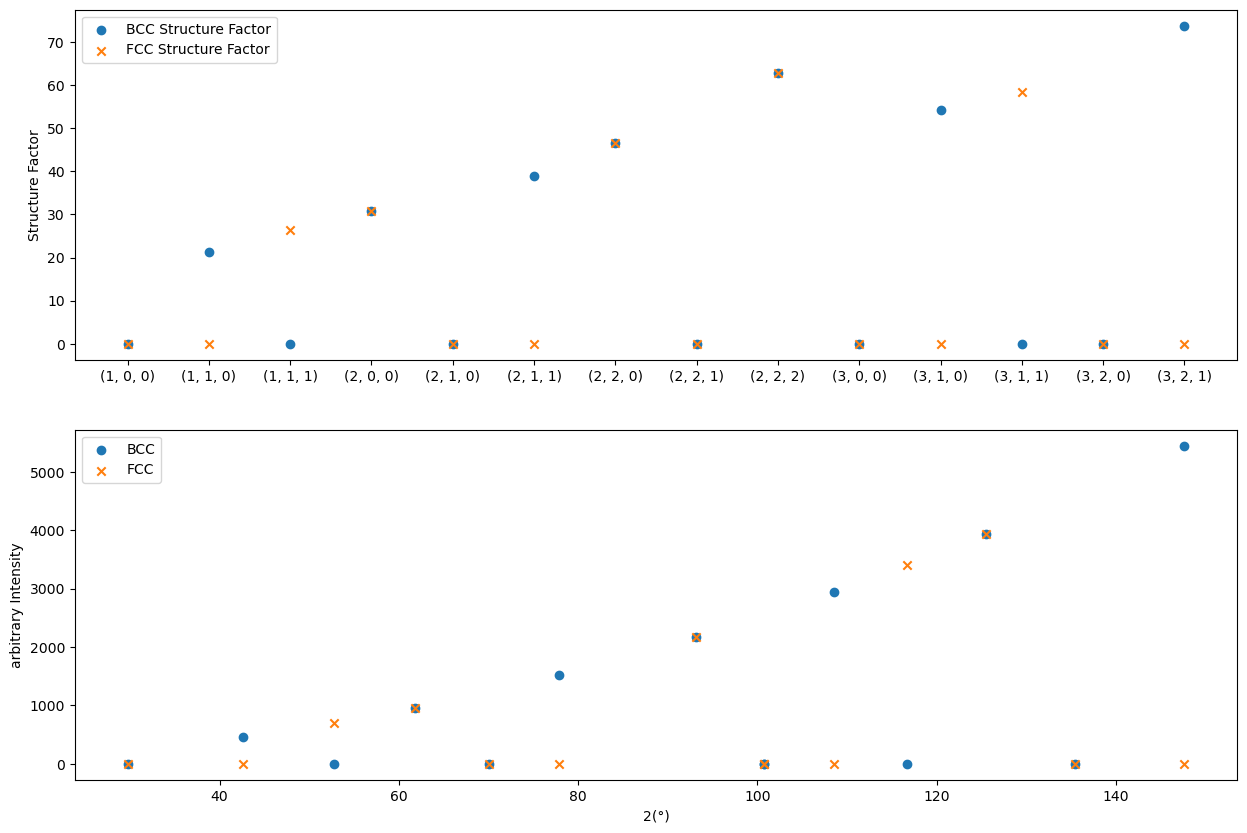

    h  k  l      d(Å)   tetha(°)  BCC Structure Factor  FCC Structure Factor
1   1  0  0  3.000000  14.872365              0.000000              0.000000
2   1  1  0  2.121320  21.283412             21.283412              0.000000
3   1  1  1  1.732051  26.395172              0.000000             26.395172
4   2  0  0  1.500000  30.886118             30.886118             30.886118
5   2  1  0  1.341641  35.024322              0.000000              0.000000
6   2  1  1  1.224745  38.954450             38.954450              0.000000
7   2  2  0  1.060660  46.549014             46.549014             46.549014
8   2  2  1  1.000000  50.353889              0.000000              0.000000
9   2  2  2  0.866025  62.762801             62.762801             62.762801
10  3  0  0  1.000000  50.353889              0.000000              0.000000
11  3  1  0  0.948683  54.257580             54.257580              0.000000
12  3  1  1  0.904534  58.349747              0.000000             58.349747

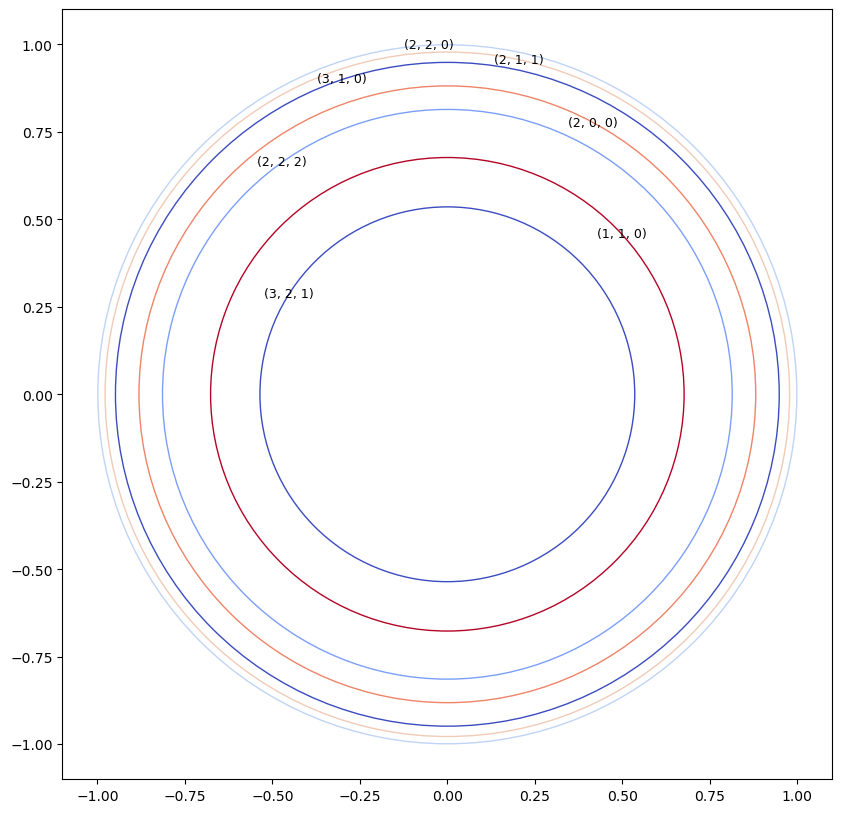

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10)) # scatter plot for BCC and FCC Structure Factor
numeric_index = range(1, len(result)+1) # create numeric index for x-axis ticks

ax1.scatter(numeric_index, result['BCC Structure Factor'], label='BCC Structure Factor', marker='o')
ax1.scatter(numeric_index, result['FCC Structure Factor'], label='FCC Structure Factor', marker='x')

ax1.set_xticks(numeric_index)
ax1.set_xticklabels(['({}, {}, {})' .format(h,k,l) for h,k,l in zip(result['h'], result['k'], result['l'])])
ax1.set_ylabel('Structure Factor')
ax1.legend()

ax2.scatter((result['tetha(°)']) * 2 , (result['BCC Structure Factor'])**2, label='BCC', marker='o')
ax2.scatter((result['tetha(°)']) * 2 , (result['FCC Structure Factor'])**2, label='FCC', marker='x')
ax2.set_xlabel('2(°)')
ax2.set_ylabel('arbitrary Intensity')
ax2.legend()

plt.show()
# Display the dataframe
print(result)

BCC_angles = result.loc[result['BCC Structure Factor'] != 0.0000, ['h','k','l','tetha(°)']]
BCC_angles['tetha(°)'] = 2*BCC_angles['tetha(°)']
BCC_angles.rename(columns={'tetha(°)':'2(°)'}, inplace=True)

FCC_angles = result.loc[result['FCC Structure Factor'] != 0.0000, ['h','k','l','tetha(°)']]
FCC_angles['tetha(°)'] = 2*FCC_angles['tetha(°)']
FCC_angles.rename(columns={'tetha(°)':'2(°)'}, inplace=True)

#Print results
print('\n')
print('The diffraction peaks of the BCC(cc) structured crystal are :\n')
print(BCC_angles)
print('\n')
print('The diffraction peaks of the FCC(fcc) structured crystal are :\n')
print(FCC_angles)

#_____Drawing the diffraction rings // dessiner les anneaux de diffraction_____
#______________________________________________________________________________

print('The powder diffraction diagram with the associated (h,k,l) indexes of the diffusing planes obtained for the BCC crystal')
print('\n')

#Create fig and axis
fig, ax4 = plt.subplots(figsize=(10, 10))

#Draw multiple rings
for idx, (angle, h,k,l) in enumerate(zip(BCC_angles['2(°)'], BCC_angles['h'], BCC_angles['k'], BCC_angles['l'])):
  radius = np.sin(np.radians(angle)) # convert to randians before taking the sinus
  color = plt.cm.coolwarm_r(idx / len(FCC_angles)) #Use a colormap to assign colors

  #Compute displacement for labels sor that they don't overlap
  label_displacement = 1.001*radius
  #Compute coordianates for the labels
  label_x = label_displacement * np.cos(np.radians(angle))
  label_y = label_displacement * np.sin(np.radians(angle))

  #(x,y)= center, radius with idstance of the screen from diffracting sample set as 1
  circle = plt.Circle((0,0), radius, edgecolor=color, facecolor ='none')
  ax4.add_patch(circle)

  #Add label at the displaced position
  ax4.text(label_x, label_y, f'({h}, {k}, {l})', fontsize=9, ha='center', va='center')

#Set axis limits
ax4.set_xlim(-1.1,1.1)
ax4.set_ylim(-1.1,1.1)

#Set aspect ratio to be equal
ax4.set_aspect('equal', adjustable='box')

plt.show()

# FCC Rings of Iron

The powder diffraction diagram with the associated (h,k,l) indexes of the diffusing planes obtained for the FCC crystal


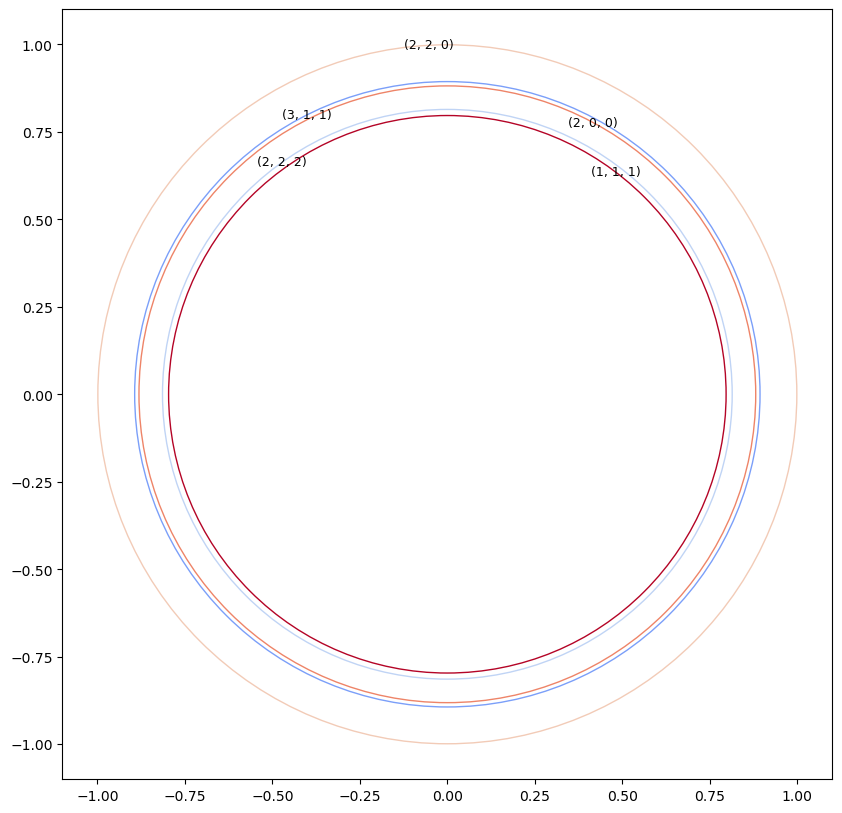

In [4]:
print('The powder diffraction diagram with the associated (h,k,l) indexes of the diffusing planes obtained for the FCC crystal')

fig, ax3 = plt.subplots(figsize=(10, 10))

for idx, (angle, h,k,l) in enumerate(zip(FCC_angles['2(°)'], FCC_angles['h'], FCC_angles['k'], FCC_angles['l'])):
  radius = np.sin(np.radians(angle))
  color = plt.cm.coolwarm_r(idx / len(FCC_angles))
  label_displacement = 1.001*radius
  label_x = label_displacement * np.cos(np.radians(angle))
  label_y = label_displacement * np.sin(np.radians(angle))
  circle = plt.Circle((0,0), radius, edgecolor=color, facecolor ='none')
  ax3.add_patch(circle)
  ax3.text(label_x, label_y, f'({h}, {k}, {l})', fontsize=9, ha='center', va='center')

ax3.set_xlim(-1.1,1.1)
ax3.set_ylim(-1.1,1.1)
ax3.set_aspect('equal', adjustable='box')

plt.show()